<a href="https://colab.research.google.com/github/ganyiwatakunda/Machine-Translation-/blob/main/Copy_of_machinetranslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/eng_shona.csv')

In [ ]:
df.head()

,eng,shona,Unnamed: 2,Unnamed: 3
0,Hi.,Mhoro.,NaN,NaN
1,Run!,Mhanya!,NaN,NaN
2,Run!,Mhanya!,NaN,NaN
3,Who?,Ndiani?,NaN,NaN
4,Wow!,Wow!,NaN,NaN


In [ ]:
df = pd.DataFrame(df, columns=['eng', 'shona'])


In [ ]:
df.head()

,eng,shona
0,Hi.,Mhoro.
1,Run!,Mhanya!
2,Run!,Mhanya!
3,Who?,Ndiani?
4,Wow!,Wow!


In [ ]:
#cleaning the text removing punctuation marks , converting to lower case
df['shona'] = df['shona'].str.replace(',', '')
df['shona']= df['shona'].str.strip()
df['shona']= df['shona'].str.lower()



In [ ]:
# Define a function to remove punctuation marks using regex
import re
def remove_punctuation(text):
    pattern = r'[^\w\s]'  # Regex pattern to match any non-word and non-space characters
    return re.sub(pattern, '', text)

# Apply the function to the 'Text' column
df['shona'] = df['shona'].apply(remove_punctuation)

In [ ]:
df['shona'] .head()

0     mhoro
1    mhanya
2    mhanya
3    ndiani
4       wow
Name: shona, dtype: object

In [ ]:
#cleaning the text removing punctuation marks , converting to lower case
df['eng'] = df['eng'].str.replace(',', '')
df['eng']= df['eng'].str.strip()
df['eng']= df['eng'].str.lower()


In [ ]:
# Define a function to remove punctuation marks using regex
import re
def remove_punctuation(text):
    pattern = r'[^\w\s]'  # Regex pattern to match any non-word and non-space characters
    return re.sub(pattern, '', text)

# Apply the function to the 'Text' column
df['eng'] = df['eng'].apply(remove_punctuation)

In [ ]:
df['eng'].head()

0     hi
1    run
2    run
3    who
4    wow
Name: eng, dtype: object

In [ ]:
df.head()

,eng,shona
0,hi,mhoro
1,run,mhanya
2,run,mhanya
3,who,ndiani
4,wow,wow


In [ ]:
# Split the dataset into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Tokenize the English sentences
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(train_data['eng'])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_seq_length = max(len(seq.split()) for seq in train_data['eng'])
eng_train_seq = eng_tokenizer.texts_to_sequences(train_data['eng'])
eng_val_seq = eng_tokenizer.texts_to_sequences(val_data['eng'])
eng_train_seq = pad_sequences(eng_train_seq, maxlen=eng_seq_length, padding='post')
eng_val_seq = pad_sequences(eng_val_seq, maxlen=eng_seq_length, padding='post')


In [ ]:
# Tokenize the Shona sentences
shona_tokenizer = Tokenizer()
shona_tokenizer.fit_on_texts(train_data['shona'])
shona_vocab_size = len(shona_tokenizer.word_index) + 1
shona_seq_length = max(len(seq.split()) for seq in train_data['shona'])
shona_train_seq = shona_tokenizer.texts_to_sequences(train_data['shona'])
shona_val_seq = shona_tokenizer.texts_to_sequences(val_data['shona'])
shona_train_seq = pad_sequences(shona_train_seq, maxlen=shona_seq_length, padding='post')
shona_val_seq = pad_sequences(shona_val_seq, maxlen=shona_seq_length, padding='post')

In [ ]:
#Define the model
model = Sequential()
model.add(Embedding(eng_vocab_size, 256, input_length=eng_seq_length, mask_zero=True))
model.add(LSTM(256))
model.add(RepeatVector(shona_seq_length))
model.add(LSTM(256, return_sequences=True))
model.add(Dense(shona_vocab_size, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Define checkpoint to save the best model
checkpoint = ModelCheckpoint('translation_model.h5', save_best_only=True)


In [ ]:
# Train the model
history = model.fit(eng_train_seq, np.expand_dims(shona_train_seq, -1),
                    validation_data=(eng_val_seq, np.expand_dims(shona_val_seq, -1)),
                    batch_size=64, epochs=20, callbacks=[checkpoint])


Epoch 1/20
266/266 [==============================] - 408s 2s/step - loss: 1.1192 - val_loss: 0.6148
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


266/266 [==============================] - 397s 1s/step - loss: 0.6646 - val_loss: 0.6102
Epoch 3/20
266/266 [==============================] - 398s 1s/step - loss: 0.6675 - val_loss: 0.6228
Epoch 4/20
266/266 [==============================] - 400s 2s/step - loss: 0.6189 - val_loss: 0.5239
Epoch 5/20
266/266 [==============================] - 397s 1s/step - loss: 0.5495 - val_loss: 0.5073
Epoch 6/20
266/266 [==============================] - 400s 2s/step - loss: 0.5287 - val_loss: 0.4899
Epoch 7/20
266/266 [==============================] - 398s 1s/step - loss: 0.5029 - val_loss: 0.4699
Epoch 8/20
266/266 [==============================] - 395s 1s/step - loss: 0.4743 - val_loss: 0.4511
Epoch 9/20
266/266 [==============================] - 393s 1s/step - loss: 0.4483 - val_loss: 0.4315
Epoch 10/20
266/266 [==============================] - 394s 1s/step - loss: 0.4215 - val_loss: 0.4138
Epoch 11/20
266/266 [==============================] - 396s 1s/step - loss: 0.3949 - val_loss: 0.3952

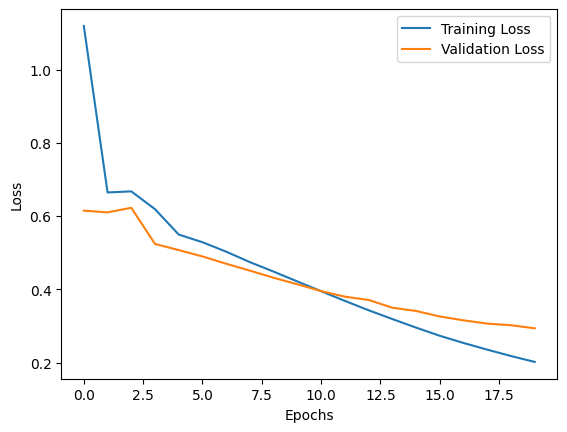

In [ ]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('translation_model.h5')

# Function to translate English sentence to Shona
def translate_sentence(sentence):
    # Tokenize and pad the input sentence
    eng_seq = eng_tokenizer.texts_to_sequences([sentence])
    eng_seq = pad_sequences(eng_seq, maxlen=eng_seq_length, padding='post')

    # Perform translation
    shona_seq = model.predict(eng_seq)

    # Convert predicted probabilities to predicted classes
    shona_classes = np.argmax(shona_seq, axis=-1)

    # Convert the translated sequence back to text
    shona_sentence = shona_tokenizer.sequences_to_texts(shona_classes)

    return shona_sentence[0]



In [ ]:

english_sentence = "what are you doing"
shona_translation = translate_sentence(english_sentence)
print("English: ", english_sentence)
print("Shona: ", shona_translation)

1/1 [==============================] - 5s 5s/step
English:  what are you doing
Shona:  nei sei


In [ ]:
english_sentence = "stop"
shona_translation = translate_sentence(english_sentence)
print("English: ", english_sentence)
print("Shona: ", shona_translation)

1/1 [==============================] - 0s 168ms/step
English:  stop
Shona:  mira


In [ ]:
english_sentence = "help me"
shona_translation = translate_sentence(english_sentence)
print("English: ", english_sentence)
print("Shona: ", shona_translation)

1/1 [==============================] - 0s 46ms/step
English:  help me
Shona:  ndibatsire


In [ ]:
english_sentence = "I trust her"
shona_translation = translate_sentence(english_sentence)
print("English: ", english_sentence)
print("Shona: ", shona_translation)

1/1 [==============================] - 0s 45ms/step
English:  I trust her
Shona:  ndinovimba naye


In [ ]:
english_sentence = "jump"
shona_translation = translate_sentence(english_sentence)
print("English: ", english_sentence)
print("Shona: ", shona_translation)

1/1 [==============================] - 0s 53ms/step
English:  jump
Shona:  svetuka


In [ ]:
english_sentence = "go on"
shona_translation = translate_sentence(english_sentence)
print("English: ", english_sentence)
print("Shona: ", shona_translation)

1/1 [==============================] - 0s 40ms/step
English:  go on
Shona:  enda
